### **Logistic Regression**

In [7]:
import math
def sigmoid(x: float)-> float:
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x: float)-> float:
    x = sigmoid(x)
    return x * (1 - x)


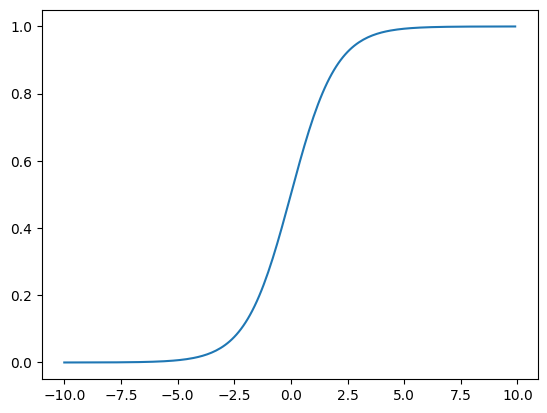

In [ ]:
#plot sigmoid curve
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-1000,1000,5) 
y = sigmoid(x)
plt.plot(x, y)
plt.show()


In [12]:
#model
import numpy as np
def h(w,x,b):
    z = np.dot(w, x) + b
    return sigmoid(z)

h(0.23,230,1)


1.0

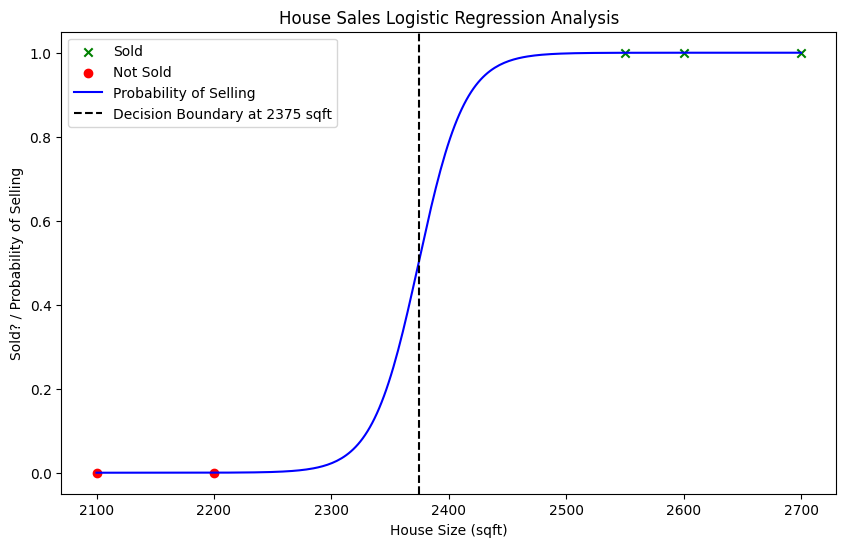

(None, 2374.9163879598664, -120.62872266398074, 0.050805803459325546)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generate our house size dataset
df = pd.DataFrame([[2100,0], [2200,0], [2550,1], [2600,1], [2700,1]], columns=['size', 'sold?'])

# Create a logistic regression classifier
clf = LogisticRegression()
clf.fit(df[['size']], df['sold?'])

# Plotting the dataset
plt.figure(figsize=(10, 6))

# Plotting the houses based on whether they were sold or not
plt.scatter(df['size'][df['sold?'] == 1], df['sold?'][df['sold?'] == 1], color='green', label='Sold', marker='x')
plt.scatter(df['size'][df['sold?'] == 0], df['sold?'][df['sold?'] == 0], color='red', label='Not Sold', marker='o')

# Creating a range of house sizes for probability prediction
house_sizes = np.linspace(df['size'].min(), df['size'].max(), 300).reshape(-1,1)
probabilities = clf.predict_proba(house_sizes)[:,1]

# Plotting the decision boundary and probabilities
plt.plot(house_sizes, probabilities, label='Probability of Selling', color='blue')

# Marking the decision boundary (where probability is 0.5)
decision_boundary = house_sizes[np.abs(probabilities-0.5).argmin()]
plt.axvline(x=decision_boundary, color='black', linestyle='--', label=f'Decision Boundary at {decision_boundary[0]:.0f} sqft')

plt.xlabel('House Size (sqft)')
plt.ylabel('Sold? / Probability of Selling')
plt.title('House Sales Logistic Regression Analysis')
plt.legend()
plt.show(), decision_boundary[0], clf.intercept_[0], clf.coef_[0][0]


In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns


# Load a binary classification dataset, for example, the breast cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)




LogisticRegression()

Accuracy:  0.9649122807017544
Precision:  0.958904109589041
Recall:  0.9859154929577465
F1 score:  0.9722222222222222


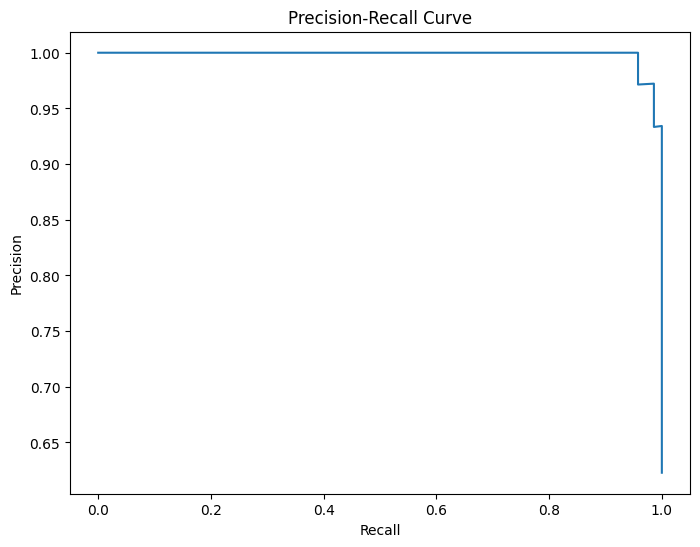

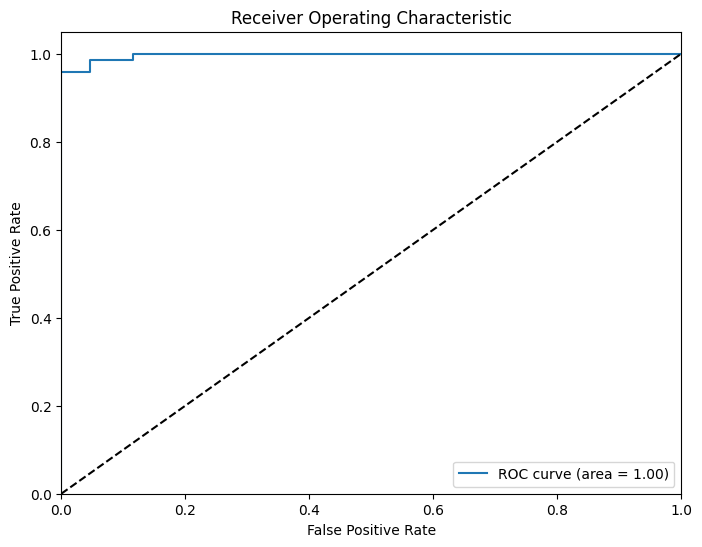

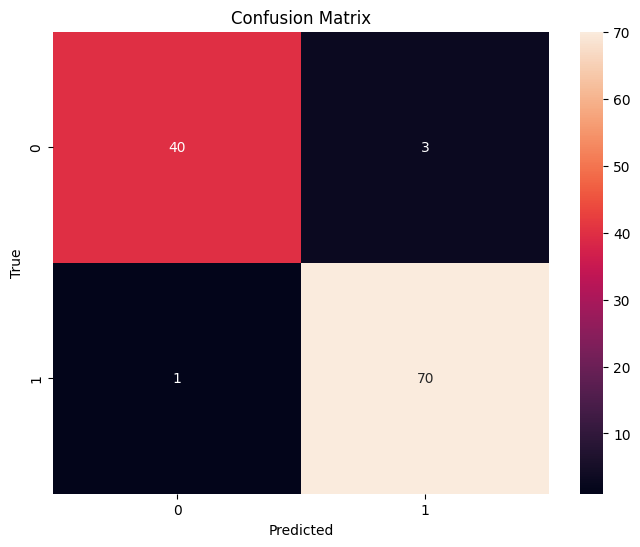

In [21]:
# Predict probabilities
y_scores = model.predict_proba(X_test)

# Compute accuracy, precision, recall and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 score: ', f1)


# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
